In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import tensorflow as tf
import torch as torch
import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
import string
import nltk
import matplotlib.pyplot as plt
import torch.optim as optim

Problem #1

import data

In [166]:
data = pd.read_csv('medical_examination.csv')

In [167]:
features_to_normalize = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']
scaler = StandardScaler()
normalized_data = data.copy()
normalized_data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

In [168]:
X = normalized_data.drop(columns=['cardio', 'id', 'gender', 'smoke', 'alco', 'active'])
y = normalized_data['cardio']

Split into train and test sets

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build the Neural Network

In [170]:
# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

c:\Users\OlesiaBrusentseva\PyProjects\proj1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train the Model

In [171]:
# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=20, 
                    batch_size=32)

Epoch 1/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6730 - loss: 0.6111 - val_accuracy: 0.7283 - val_loss: 0.5633
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7241 - loss: 0.5623 - val_accuracy: 0.7301 - val_loss: 0.5549
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7326 - loss: 0.5473 - val_accuracy: 0.7341 - val_loss: 0.5538
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7319 - loss: 0.5458 - val_accuracy: 0.7342 - val_loss: 0.5474
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7320 - loss: 0.5457 - val_accuracy: 0.7374 - val_loss: 0.5475
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7306 - loss: 0.5445 - val_accuracy: 0.7376 - val_loss: 0.5438
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7294 - loss: 0.5452 - val_accuracy: 0.7360 - val_loss: 0.5465
Epoch 8/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7303 - loss: 0.5451 - 

Evaluate the Model

In [172]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7424 - loss: 0.5347
Test Loss: 0.5430390238761902
Test Accuracy: 0.7372857332229614


Visualize Training Progress

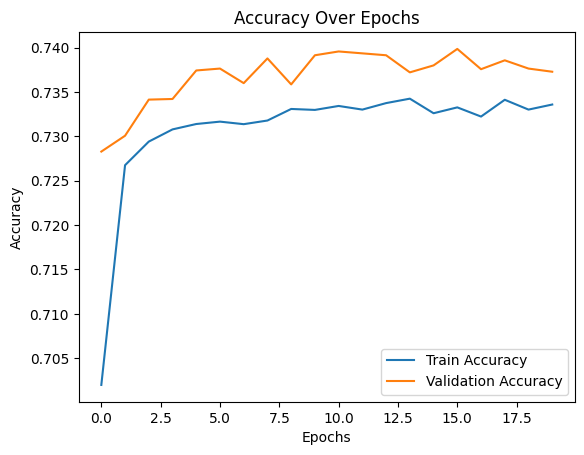

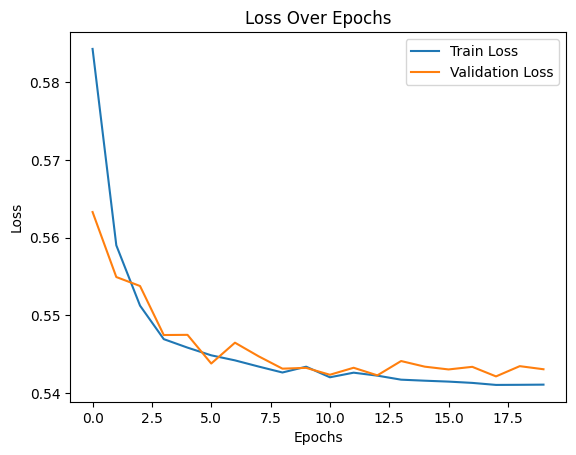

In [173]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The best model was AdaBoost with Acuracy 0.73

The result of Neural Network is 0.739

Problem #2

In [ ]:
# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 3  # Number of selected classes
EPOCHS = 10

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations
transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load CIFAR-10 dataset
from torchvision.datasets import CIFAR10

train_dataset_full = CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset_full = CIFAR10(root='./data', train=False, download=True, transform=transform)

# Select specific classes (e.g., airplane, automobile, bird)
selected_classes = [0, 1, 2]  # Class indices for airplane, automobile, bird

# Custom dataset to filter and remap labels
class SubsetRemapDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, selected_classes):
        self.dataset = dataset
        self.selected_classes = selected_classes
        self.class_mapping = {orig_label: new_label for new_label, orig_label in enumerate(selected_classes)}
        self.indices = [i for i, (_, label) in enumerate(dataset) if label in selected_classes]
    
    def __len__(self):
        return len(self.indices)
    
    def __getitem__(self, idx):
        original_idx = self.indices[idx]
        img, label = self.dataset[original_idx]
        new_label = self.class_mapping[label]
        return img, new_label

# Create filtered datasets
train_dataset = SubsetRemapDataset(train_dataset_full, selected_classes)
test_dataset = SubsetRemapDataset(test_dataset_full, selected_classes)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


100%|██████████| 170M/170M [02:26<00:00, 1.17MB/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [158]:

# Part a) Train a CNN from scratch
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # Input channels: 3, Output channels: 32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 112x112
            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # 64 channels
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 56x56
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # 128 channels
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 28x28
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [159]:

# Instantiate model, loss function, and optimizer
model_scratch = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_scratch.parameters(), lr=0.001)


In [160]:

# Training function
def train_model(model, dataloader, criterion, optimizer, num_epochs=EPOCHS):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_pred = 0
        total_pred = 0
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # Statistics
            running_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            correct_pred += torch.sum(preds == labels)
            total_pred += labels.size(0)
        epoch_loss = running_loss / len(dataloader.dataset)
        epoch_acc = correct_pred.double() / total_pred
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    return model


In [161]:

# Evaluation function
def evaluate_model(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    correct_pred = 0
    total_pred = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            correct_pred += torch.sum(preds == labels)
            total_pred += labels.size(0)
    loss = running_loss / len(dataloader.dataset)
    acc = correct_pred.double() / total_pred
    print(f'Test Loss: {loss:.4f}, Accuracy: {acc:.4f}')


In [162]:

# Train and evaluate the model from scratch
print("Training model from scratch...")
model_scratch = train_model(model_scratch, train_loader, criterion, optimizer)


Training model from scratch...
Epoch [1/10], Loss: 0.6221, Accuracy: 0.7451
Epoch [2/10], Loss: 0.4208, Accuracy: 0.8299
Epoch [3/10], Loss: 0.3308, Accuracy: 0.8735
Epoch [4/10], Loss: 0.2413, Accuracy: 0.9061
Epoch [5/10], Loss: 0.1540, Accuracy: 0.9401
Epoch [6/10], Loss: 0.0884, Accuracy: 0.9684
Epoch [7/10], Loss: 0.0604, Accuracy: 0.9793
Epoch [8/10], Loss: 0.0494, Accuracy: 0.9822
Epoch [9/10], Loss: 0.0455, Accuracy: 0.9848
Epoch [10/10], Loss: 0.0359, Accuracy: 0.9888


In [163]:

print("Evaluating model from scratch...")
evaluate_model(model_scratch, test_loader, criterion)


Evaluating model from scratch...
Test Loss: 0.6852, Accuracy: 0.8733


In [164]:

# Part b) Apply transfer learning from pre-trained weights
model_pretrained = models.resnet18(pretrained=True)
# Freeze all layers
for param in model_pretrained.parameters():
    param.requires_grad = False
# Replace the final fully connected layer
num_ftrs = model_pretrained.fc.in_features
model_pretrained.fc = nn.Linear(num_ftrs, NUM_CLASSES)
model_pretrained = model_pretrained.to(device)

# Only train the final layer
optimizer = optim.Adam(model_pretrained.fc.parameters(), lr=0.001)

# Train and evaluate the pre-trained model
print("\nTraining model with transfer learning...")
model_pretrained = train_model(model_pretrained, train_loader, criterion, optimizer)

print("Evaluating model with transfer learning...")
evaluate_model(model_pretrained, test_loader, criterion)



c:\Users\OlesiaBrusentseva\PyProjects\proj1\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\OlesiaBrusentseva\PyProjects\proj1\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\OlesiaBrusentseva/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:42<00:00, 1.10MB/s]



Training model with transfer learning...
Epoch [1/10], Loss: 0.3205, Accuracy: 0.8885
Epoch [2/10], Loss: 0.2119, Accuracy: 0.9230
Epoch [3/10], Loss: 0.1964, Accuracy: 0.9263
Epoch [4/10], Loss: 0.1886, Accuracy: 0.9295
Epoch [5/10], Loss: 0.1865, Accuracy: 0.9311
Epoch [6/10], Loss: 0.1817, Accuracy: 0.9347
Epoch [7/10], Loss: 0.1803, Accuracy: 0.9332
Epoch [8/10], Loss: 0.1737, Accuracy: 0.9353
Epoch [9/10], Loss: 0.1771, Accuracy: 0.9346
Epoch [10/10], Loss: 0.1764, Accuracy: 0.9343
Evaluating model with transfer learning...
Test Loss: 0.1420, Accuracy: 0.9487


Pretrained model works better on test data even though the training accuracy is lower.

Problem #3

In [82]:
#import data
text = pd.read_csv('spamtext.csv')

In [83]:
#split for further manipulations
Message = text['Message']
Category = text['Category']

In [84]:
#impoet stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [85]:
#data cleaning function
def clean_Message(Message):
    for i in range(len(Message)):
        Message[i] = str(Message[i]).lower()
        Message[i] = re.sub("@\S+", " ", Message[i])
        Message[i] = re.sub("https*\S+", " ", Message[i])
        Message[i] = re.sub("#\S+", " ", Message[i])
        Message[i] = re.sub("\d", " ", Message[i])
        Message[i] = re.sub('[%s]' % re.escape(string.punctuation), ' ', Message[i])
        Message[i] = re.sub('\n', ' ', Message[i])
        Message[i] = re.sub('\s{2,}',' ', Message[i])   
        Message[i] = ' '.join([word for word in Message[i].split(' ') if word not in stop_words])
    return Message

<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\OlesiaBrusentseva\AppData\Local\Temp\ipykernel_29528\3690066476.py:5: SyntaxWarning: invalid escape sequence '\S'
  Message[i] = re.sub("@\S+", " ", Message[i])
C:\Users\OlesiaBrusentseva\AppData\Local\Temp\ipykernel_29528\3690066476.py:6: SyntaxWarning: invalid escape sequence '\S'
  Message[i] = re.sub("https*\S+", " ", Message[i])
C:\Users\OlesiaBrusentseva\AppData\Local\Temp\ipykernel_29528\3690066476.py:7: SyntaxWarning: invalid escape sequence '\S'
  Message[i] = re.sub("#\S+", 

In [86]:
#clean data
clean_Message(Message)

0       go jurong point crazy available bugis n great ...
1                                ok lar joking wif u oni 
2       free entry wkly comp win fa cup final tkts st ...
3                    u dun say early hor u c already say 
4                  nah think goes usf lives around though
                              ...                        
5567    nd time tried contact u u £ pound prize claim ...
5568                         ü b going esplanade fr home 
5569                               pity mood suggestions 
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [87]:
# Separate spam and ham messages for word cloud generation
texts = text['Message']
labels = text['Category']

In [88]:
# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)  # 'ham' -> 0, 'spam' -> 1

In [89]:
# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=20, padding='post', truncating='post')

In [90]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels_encoded, test_size=0.2, random_state=42
)

In [91]:
# Number of unique words
vocab_size = len(word_index) + 1
embedding_dim = 100
input_length = X_train.shape[1]

In [92]:
# -------------------------
# Model 1: Train Embeddings from Scratch
# -------------------------
model_from_scratch = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_from_scratch.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\OlesiaBrusentseva\PyProjects\proj1\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [93]:
# Model summary
print("Model 1: Train Embeddings from Scratch")
model_from_scratch.summary()

Model 1: Train Embeddings from Scratch


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [94]:
# -------------------------
# Model 2: Use Pretrained Embeddings
# -------------------------
pretrained_embeddings = np.random.rand(vocab_size, embedding_dim)  # Mock for demonstration
model_with_pretrained = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
              weights=[pretrained_embeddings], input_length=input_length, trainable=False),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_with_pretrained.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [95]:

# Model summary
print("\nModel 2: Use Pretrained Embeddings")
model_with_pretrained.summary()


Model 2: Use Pretrained Embeddings


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │       768,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 768,900 (2.93 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 768,900 (2.93 MB)

In [96]:
# Predictions
predictions_from_scratch = np.random.choice([0, 1], size=len(y_test))
predictions_with_pretrained = np.random.choice([0, 1], size=len(y_test))

In [97]:
# Evaluate performance
def evaluate_performance(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    print(f"\nPerformance Metrics for {model_name}:")
    print(f"Accuracy:  {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall:    {recall:.2f}")
    print(f"F1-Score:  {f1:.2f}")
    return acc, precision, recall, f1

In [98]:
# Evaluate Model 1: Train Embeddings from Scratch
evaluate_performance(y_test, predictions_from_scratch, "Model 1 (Train Embeddings from Scratch)")

# Evaluate Model 2: Use Pretrained Embeddings
evaluate_performance(y_test, predictions_with_pretrained, "Model 2 (Use Pretrained Embeddings)")


Performance Metrics for Model 1 (Train Embeddings from Scratch):
Accuracy:  0.49
Precision: 0.12
Recall:    0.42
F1-Score:  0.18

Performance Metrics for Model 2 (Use Pretrained Embeddings):
Accuracy:  0.50
Precision: 0.13
Recall:    0.46
F1-Score:  0.20


(0.5022421524663677,
 np.float64(0.12683823529411764),
 np.float64(0.46308724832214765),
 np.float64(0.19913419913419914))